# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arya Dwinata Mustapa
- **Email:** aryadwinatamustapa@gmail.com
- **ID Dicoding:** aryadwinatamustapa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kepuasan pelanggan berdasarkan skor ulasan selama periode tahun 2016 hingga 2018?
- Wilayah mana yang memiliki total pengeluaran tertinggi dari pelanggan dalam pembelian pada tahun 2018?
- Berikan 10 barang apa saja yang kah paling dan tidak laris dalam penjualan?

## Import Semua Packages/Library yang Digunakan

In [206]:
import zipfile
import os
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium
import gdown

## Mengekstrak File Yang Masih Berbentuk ZIP

In [207]:
# Langkah 1: Mengunduh file ZIP dari Google Drive
# URL file ZIP dari Google Drive
drive_url = 'https://drive.google.com/uc?id=14dhKc6mO903ST3PTEOA19yXJaFn4re0F'
zip_file_path = '/content/data.zip'

# Mengunduh file ZIP
gdown.download(drive_url, zip_file_path, quiet=False)

# Langkah 2: Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Langkah 3: Cek daftar file di dalam folder yang diekstrak
extracted_files = os.listdir('/content/dataset')
print("File yang diekstrak:", extracted_files)

Downloading...
From (original): https://drive.google.com/uc?id=14dhKc6mO903ST3PTEOA19yXJaFn4re0F
From (redirected): https://drive.google.com/uc?id=14dhKc6mO903ST3PTEOA19yXJaFn4re0F&confirm=t&uuid=40791c5b-5ab4-4e56-a038-38b51ad25354
To: /content/data.zip
100%|██████████| 46.0M/46.0M [00:01<00:00, 29.2MB/s]


File yang diekstrak: ['data']


**Insight tahapan ekstrak file ZIP:**
- Proses ekstraksi dilakukan untuk mempercepat pengunggahan dataset yang memiliki ukuran besar. Dengan mengunggah file ZIP, waktu yang dibutuhkan untuk proses pengunggahan dapat dihemat, sehingga meningkatkan efisiensi keseluruhan.
- ketika sudah menjalan kan harap refresh bagian folder jika folder dataset belum muncul (google collab)

## Data Wrangling

### Gathering Data

### 1. customer_dataset





In [208]:
customers_df = pd.read_csv('/content/dataset/data/customers_dataset.csv')
customers_df.head() #Menampilkan isi dari dataset customer_dataset yang mana defaultnya jika tidak kita tentukan akan menampilkan data index ke 0 hingga ke 4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 2. geolocation_dataset

In [209]:
geolocation_df = pd.read_csv('/content/dataset/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### 3. order_items_dataset

In [210]:
order_items_df = pd.read_csv('/content/dataset/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 4. order_payments_dataset

In [211]:
order_payments_df = pd.read_csv('/content/dataset/data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 5. order_reviews_dataset

In [212]:
order_reviews_df = pd.read_csv('/content/dataset/data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 6. orders_dataset

In [213]:
orders_df = pd.read_csv('/content/dataset/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 7. product_category_name_translation

In [214]:
product_category_name_translation_df = pd.read_csv('/content/dataset/data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 8. products_dataset

In [215]:
products_df = pd.read_csv('/content/dataset/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 9. sellers_dataset

In [216]:
sellers_df = pd.read_csv('/content/dataset/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight pada tahapan Gathering Data:**
- Membaca Setiap dataset, seperti customers_dataset, orders_dataset, dan lainnya, dibaca menggunakan fungsi `pd.read_csv().` Langkah ini penting karena memungkinkan kita untuk mengakses data dalam bentuk dataframe, yang merupakan struktur data yang lebih mudah diolah di Python menggunakan pustaka seperti Pandas.
- Setelah data diimpor, kita menggunakan metode `.head()` untuk menampilkan beberapa baris pertama dari setiap dataset. Tujuan dari langkah ini adalah untuk memastikan bahwa data telah terbaca dengan benar, memahami struktur dan tipe data (seperti kolom apa saja yang ada), serta mengidentifikasi potensi masalah seperti missing values atau format yang tidak sesuai.

### Assessing Data

### Fungsi
Membuat sebuah fungsi yang berguna agar tidak melakukan penulisan code secara berulang yang mana akan waste time


In [217]:
def tabel_analisis(df):
    # info table
    print(f"\n========== Info Tabel ==========\n")
    df.info()

    # missing values table
    print(f"\n========== Missing Value ==========\n")
    print(df.isna().sum())

    # duplicated values count
    print(f"\n========== Jumlah Duplikasi ==========\n")
    print(df.duplicated().sum())

    # table description
    print(f"\n========== Deskripsi Tabel ==========\n")
    print(df.describe())

### 1. customers_dataset

In [218]:
tabel_analisis(customers_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

========== Missing Value ==========

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

========== Jumlah Duplikasi ==========

0

========== Deskripsi Tabel ==========

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min              

### 2. geolocation_dataset

In [219]:
tabel_analisis(geolocation_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

========== Missing Value ==========

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

========== Jumlah Duplikasi ==========

261831

========== Deskripsi Tabel ==========

       geolocation_zip_code_prefix  geolocation_lat  geolocation_l

### 3. order_items_dataset

In [220]:
tabel_analisis(order_items_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

========== Missing Value ==========

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

========== Jumlah Duplikasi ==========

0

========== Deskripsi Tabel ==========

       order_item_id     

### 4. order_payments_dataset

In [221]:
tabel_analisis(order_payments_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

========== Missing Value ==========

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

========== Jumlah Duplikasi ==========

0

========== Deskripsi Tabel ==========

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              

### 5. order_reviews_dataset

In [222]:
tabel_analisis(order_reviews_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

========== Missing Value ==========

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

========== Jumlah Duplikasi ==========

0

====

### 6. orders_dataset

In [223]:
tabel_analisis(orders_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

========== Missing Value ==========

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160

7. product_category_name_translation

In [224]:
tabel_analisis(product_category_name_translation_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

========== Missing Value ==========

product_category_name            0
product_category_name_english    0
dtype: int64

========== Jumlah Duplikasi ==========

0

========== Deskripsi Tabel ==========

       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


### 8. products_dataset

In [225]:
tabel_analisis(products_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

========== Missing Value ==========

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
prod

### 9. sellers_dataset

In [226]:
tabel_analisis(sellers_df)


========== Info Tabel ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

========== Missing Value ==========

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

========== Jumlah Duplikasi ==========

0

========== Deskripsi Tabel ==========

       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max       

**Insight pada tahapan Assessing Data:**
- **Informasi Tabel**: Setiap dataframe telah diperiksa untuk mengetahui struktur kolom, jumlah baris, dan tipe data. Ini membantu memahami apakah tipe data sudah sesuai, terutama untuk kolom tanggal atau nilai numerik yang mungkin perlu diubah.
- **Missing Values**: Identifikasi nilai yang hilang di setiap dataset, sehingga bisa menentukan apakah perlu melakukan imputasi data, penghapusan, atau metode penanganan lainnya.
- **Duplikasi Data**: Pendeteksian jumlah baris yang duplikat untuk memastikan tidak ada data redundan yang bisa memengaruhi analisis.
- **Deskripsi Statistik**: Perhitungan statistik deskriptif untuk setiap dataset memberikan gambaran distribusi data, seperti mean, standar deviasi, nilai minimum dan maksimum, serta quartile, untuk memahami persebaran nilai numerik.

### Cleaning Data

### 1. Data Duplikat
Pada hasil dari tabel analisis sebelumnya kita dapat mengambil kesimpulan bahwa data duplikasi hanya terdapat pada geolocation_dataset yang mana terdapat 261831 data duplikat

Menghilangkan data duplikat

In [227]:
geolocation_df.drop_duplicates(inplace=True)

In [228]:
print("Jumlah duplikasi setelah dihilangkan: ", geolocation_df.duplicated( ).sum())

Jumlah duplikasi setelah dihilangkan:  0


### 2. Missing Value
Missing value pada dataset juga hanya terjadi di data ke 5, 6, dan 8

Identifikasi Missing Valuenya

In [229]:
print(order_reviews_df.isna().sum())
print(orders_df.isna().sum())
print(products_df.isna().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


### Penanganan Missing Value

**Pengisian missing value pada order reviews dataset (data ke 5)**

disini dilakukan pengisian terhadap missing valuenye yang mana, disini yang missng terdapat pada bagian review comment tittlenya dan review comment messagenya

In [230]:
# Mengisi nilai kosong pada kolom 'review_comment_title' dengan 'No Title'
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
# Mengisi nilai kosong pada kolom 'review_comment_message' dengan 'No Comment'
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

<ipython-input-230-dedb9dd52271>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
<ipython-input-230-dedb9dd52271>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

**Pengisian missing value pada orders datasets (data ke 6)**

Yang mana disini saya melakukan pengisian menggunaka  logika matematika dengan syarat:
1. order_approved_at harus lebih besar dari order_purchase_timestamp (waktu pesanan dibuat). Jika order_approved_at hilang, kita bisa mengisinya dengan order_purchase_timestamp atau nilai rata-rata yang masuk akal setelah pesanan dibuat.

2. order_delivered_carrier_date (tanggal pesanan dikirim ke kurir) harus setelah order_approved_at. Jika nilai ini hilang, kita dapat mengisi dengan estimasi berdasarkan selisih rata-rata antara order_approved_at dan order_delivered_carrier_date.

3. order_delivered_customer_date (tanggal pesanan diterima pelanggan) harus setelah order_delivered_carrier_date. Jika nilai ini hilang, kita dapat menggunakan selisih rata-rata antara order_delivered_carrier_date dan order_delivered_customer_date.

In [231]:
# Mengonversi kolom menjadi objek datetime
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Mengisi nilai kosong pada kolom 'order_approved_at' dengan 'order_purchase_timestamp'
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

# Mengisi nilai kosong pada 'order_delivered_carrier_date' menggunakan selisih rata-rata dari 'order_approved_at'
avg_carrier_time = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).mean()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + avg_carrier_time)

# Mengisi nilai kosong pada 'order_delivered_customer_date' menggunakan selisih rata-rata dari 'order_delivered_carrier_date'
avg_delivery_time = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).mean()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(
orders_df['order_delivered_carrier_date'] + avg_delivery_time)

<ipython-input-231-1dd6c758cca3>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)


**Penanganan Missing Value pada products_df (data ke 9)**

In [232]:
# Drop missing value pada kolom-kolom tertentu
products_df = products_df.dropna(subset=[
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
])

# Ganti missing value pada kolom lain dengan rata-rata
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

<ipython-input-232-cb35516e5a81>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
<ipython-input-232-cb35516e5a81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
<ipython-input-232-cb35516e5a81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [233]:
print(order_reviews_df.isna().sum())
print(orders_df.isna().sum())
print(products_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight pada tahapan Cleaning Data**:
- Dataset `geolocation_df` memiliki 261,831 data duplikat yang dihapus untuk memastikan tidak ada informasi yang redundan dan analisis data berjalan akurat.
-Missing value ditemukan pada `order_reviews_df`, `orders_df`, dan `products_df`, sehingga perlu dilakukan penanganan agar analisis data tidak terganggu.
-Nilai kosong pada kolom `review_comment_title` diisi dengan 'No Title' dan `review_comment_message` diisi dengan 'No Comment' untuk memastikan tidak ada informasi yang hilang terkait ulasan pelanggan.
-Menggunakan logika matematika untuk mengisi kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` berdasarkan waktu-waktu terkait, dengan mengisi nilai yang hilang menggunakan rata-rata selisih antara kolom-kolom tersebut. Ini memastikan bahwa urutan waktu pengiriman tetap valid, meskipun beberapa data hilang.
-Nilai kosong pada kolom seperti `product_category_name`, `product_name_lenght`, dan `product_description_lenght` di-drop.
-Kolom seperti `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` diisi dengan nilai rata-rata agar dimensi produk tetap konsisten.

## Exploratory Data Analysis (EDA)

### Explor customer_df

In [234]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [235]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
88964,178049c612998e8e479d038c4cc6424b,45fb317de39db77813c19dfe0895e8df,27940,macae,RJ
73207,386e96046ce0e77e5c9a9a4e818da93c,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
5602,84753c5501b169c54f67ca98918de0cc,cc6fb2f08a7bcaeef2c65f06e40811df,5340,sao paulo,SP
79271,ee9f244fe735d376a5a7a755431cd494,1b8e32b9748d27829b9e496dc8622630,64000,teresina,PI
38359,606a373040ab8900cd368e44e6a7bb9b,15830e3bb000855aa09f415315a6f37d,39400,montes claros,MG


In [236]:
customers_df.customer_id.is_unique

True

In [237]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [238]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explor order_payments_df

In [239]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [240]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52961,46b3fd7575085d6acefa04739e8c03a5,1,credit_card,8,289.11
69761,cd452825757203504f7c8c7ddd201907,1,credit_card,2,55.13
69837,311033a32a090c758aced7844f53d0b3,1,credit_card,3,112.39
11593,14b28f4fb9a1df2b37343827f4ee5a33,1,credit_card,1,39.78
30431,22aaa02adda54ed16ee8d3eed7cb23f9,1,credit_card,2,110.20


In [241]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explor orders_df

In [242]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
51902,8c5e882bb85543c0975f68712ea66b5f,e9fade7e1c719ddde440027916f6e5e0,delivered,2018-07-13 08:48:58,2018-07-13 09:05:11,2018-07-17 13:46:00,2018-07-23 10:12:46,2018-08-06 00:00:00
81628,c23118f80a11f1fe5147253748fc761e,aa91f01bcc7a30c350db6dcd5322a5fb,delivered,2018-08-09 19:50:59,2018-08-09 20:05:16,2018-08-10 15:26:00,2018-08-13 22:46:41,2018-08-15 00:00:00
78549,8906cb0ae3ccbd4613940de05579b218,fd5ddf911dca5e102a4856a2ace88a09,delivered,2018-02-12 22:25:07,2018-02-12 22:35:30,2018-02-19 23:39:37,2018-02-21 00:33:39,2018-02-26 00:00:00
57576,a0148d30bd60b1529214a696f8be8aea,c2a42c6cf2c1a14683e01d64890e8ae5,delivered,2017-07-18 11:20:53,2017-07-18 11:30:24,2017-07-19 19:33:39,2017-08-23 17:42:59,2017-08-11 00:00:00
23964,ef06e7945c6c75f875b06db75ea438cc,5868eb63b97a6fa6b79d9eeecceb08e9,delivered,2017-10-31 13:58:55,2017-10-31 14:10:46,2017-11-01 17:52:33,2017-11-13 18:12:20,2017-11-23 00:00:00


In [243]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [244]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
57002,d70eae092adeb15c5bf4f8aba1819cd2,b532f55f394823c201ee11287828d37f,delivered,2017-09-30 15:13:39,2017-09-30 15:24:36,2017-10-04 01:35:03,2017-10-05 17:14:49,2017-10-18 00:00:00,2.0
84705,2b88a26c626a1091116a727133c5a1c6,2d05a3af79bd57cecb97416cfd6bf5fc,delivered,2018-05-12 19:14:02,2018-05-12 19:30:24,2018-05-15 13:29:00,2018-05-23 15:52:19,2018-06-07 00:00:00,8.0
67292,aed8573ac2c1e7bdccb04472bbeaec39,30e44634f95a0c8423585cddd8d89c12,delivered,2018-03-27 14:30:53,2018-03-27 14:47:55,2018-03-29 19:21:51,2018-04-02 17:28:30,2018-04-09 00:00:00,4.0
3816,57694158da92a85b1fcd72de45542073,d9037ff057cfcc2f16b1abd6933dbba9,delivered,2018-02-02 22:49:58,2018-02-02 23:10:45,2018-02-05 21:38:56,2018-02-10 11:28:49,2018-03-01 00:00:00,5.0
73031,620133b0b32ccf5727e6c53ba3b0fb75,dfcd94e8493dc5b9551c733d5a5e89c3,delivered,2018-07-20 20:36:01,2018-07-20 20:45:16,2018-07-24 05:55:00,2018-07-28 00:37:27,2018-08-08 00:00:00,4.0


In [245]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
10269,6491f7a16a09abf283fdb6ba317a67a8,ce0f3a230f9b27537192e9de148a3238,13030,campinas,SP,Active
32958,7cbb47ab67fb071367951c3007ceedb8,cab8bb774d68b4a3941fb96c4e18e975,37524,natercia,MG,Active
76141,573955e60264b88c1ceffbdddd8ffbcd,c5157b7836a33d5470c4027bcf8267d0,39400,montes claros,MG,Active
18415,bf10f1fd7fd870f4d92a239792498714,052806f8907d1163510946ecadd77427,13309,itu,SP,Active
71918,154b550a221177b362f085100e0ea1a4,adff41dbe0d40058d786df6675faba6a,65901,imperatriz,MA,Active
11696,87625e615967355b18866bfd41894377,aa7d65c5fe2077f8939817d6e0b4f3da,33400,lagoa santa,MG,Active
19153,3302a1ea4704c28ed03c480d2adf369c,e91359c5de7a2e07691bf53ad392deee,89221,joinville,SC,Active
19432,7df771c7ffd3c5162105a5255e625d8a,6d373c267e57e0d7dd094bd564e2266f,22770,rio de janeiro,RJ,Active
98498,0e9ed7dc549f24ff1b3aefd168591469,43c91b8a1bc8ee8ad0005a2690d4c39c,7134,guarulhos,SP,Active
89912,00aee581138f207eb71f58811aae25d1,7cdad7ad32a8ed3d160ca312e16d29f1,9750,sao bernardo do campo,SP,Active


In [246]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


### Explor customer_df & orders_df

In [247]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,10.0


In [248]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [249]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [250]:
customers_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


### Explor data order_payments_df dan order_reviews_df

In [251]:
order_payment_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Comment,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Comment,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Comment,2017-12-21 00:00:00,2017-12-22 01:10:39


In [252]:
order_payment_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [253]:
order_payment_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27 00:00:00,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaN,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Title,No Comment,2017-06-06 00:00:00,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17 00:00:00,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No Comment,2018-08-24 00:00:00,2018-08-25 02:24:54


In [254]:
order_payment_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Membuat data costumer yang baru berdasarkan hasil analisis sebelumnya

In [255]:
new_customers_df = pd.merge(
    left=customers_orders_df,
    right=order_payment_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Comment,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Comment,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Comment,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Comment,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


### Menggabungkan data orders_item_df dan sellers_df

In [256]:
order_items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_items_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [257]:
order_items_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [258]:
order_items_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Explor orders_df & order_reviews_df

In [259]:
merged_reviews_orders_df = pd.merge(
    left=order_reviews_df,
    right=orders_df[['order_id', 'order_purchase_timestamp']],
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
merged_reviews_orders_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,2018-01-11 15:30:49
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13,2018-02-28 12:25:19
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24,2018-02-03 09:56:22
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2017-04-09 17:41:13
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2018-02-10 10:59:03


### Membuat data produk terbaru

In [260]:
new_product_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [261]:
new_product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [262]:
new_product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Menggabungkan data order_items_seller_df dan new_product_df

In [263]:
new_sellers_df = pd.merge(
    left=new_product_df,
    right=order_items_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [264]:
new_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72949,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48844,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70870,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31829,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,17,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9218,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,18,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [265]:
new_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Menggaungkan costumer_df, orders_df, dan order_payments_df

In [266]:
orders_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df[['order_id', 'payment_value']],
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

customer_orders_df = pd.merge(
    left=orders_payments_df,
    right=customers_df[['customer_id', 'customer_state']],
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

### Menggabungkan semua data

In [267]:
all_data = pd.merge(
    left=new_customers_df,
    right=new_sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [268]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118916 entries, 0 to 118915
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118916 non-null  object        
 1   customer_unique_id             118916 non-null  object        
 2   customer_zip_code_prefix       118916 non-null  int64         
 3   customer_city                  118916 non-null  object        
 4   customer_state                 118916 non-null  object        
 5   status                         118916 non-null  object        
 6   order_id                       118916 non-null  object        
 7   order_status                   118916 non-null  object        
 8   order_purchase_timestamp       118916 non-null  datetime64[ns]
 9   order_approved_at              118916 non-null  datetime64[ns]
 10  order_delivered_carrier_date   118916 non-null  datetime64[ns]
 11  

In [269]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [270]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [271]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7704995.19
RJ,12852,2789943.31
MG,11635,2348832.08
RS,5466,1150630.26
PR,5045,1078393.10
BA,3380,801658.12
SC,3637,800447.82
GO,2020,519540.42
DF,2140,437836.87


In [272]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Menjadikannya data baru untuk tahapan selannjutnya

In [273]:
all_data.to_csv('all_data.csv', index=False)

**Insight pada tahapan Exploratory Data Analysis (EDA):**
- Melakukan analisis awal pada dataset pelanggan, pembayaran, dan pesanan untuk memahami struktur dan distribusi data.
- Mengidentifikasi jumlah pelanggan unik berdasarkan kota dan negara bagian, memberikan wawasan tentang konsentrasi pelanggan di berbagai wilayah.
-Mengeksplorasi metode pembayaran yang digunakan oleh pelanggan, serta menganalisis nilai pembayaran berdasarkan tipe pembayaran untuk memahami preferensi pelanggan.
-Menghitung waktu pengiriman dengan menghitung selisih antara tanggal pengiriman dan tanggal penerimaan untuk menilai efisiensi pengiriman.
- Mengklasifikasikan status pelanggan (Aktif vs. Non-Aktif) berdasarkan partisipasi mereka dalam pesanan.
- Menggabungkan dataset pelanggan dengan data pesanan dan pembayaran untuk mendapatkan gambaran yang lebih lengkap tentang hubungan antara pelanggan dan transaksi mereka.
-Menggabungkan data produk dan penjual untuk menganalisis jumlah produk yang dijual berdasarkan kategori dan lokasi penjual.
-Menilai harga produk dan variasi kategori untuk mengidentifikasi peluang untuk meningkatkan penjualan.
-Menyusun laporan mengenai jumlah pesanan dan nilai pembayaran berdasarkan kota, negara bagian, dan kategori produk untuk memahami kinerja bisnis secara keseluruhan.
-Yang terakhir, menggabungkan semua data yang relevan menjadi satu dataset lengkap `(all_data.csv)` yang siap untuk analisis dan visualisasi lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Kepuasan Pelanggan Berdasarkan Skor Ulasan Selama Periode Tahun 2016 hingga 2018?

In [274]:
merged_reviews_orders_df['order_purchase_timestamp'] = pd.to_datetime(merged_reviews_orders_df['order_purchase_timestamp'])
merged_reviews_orders_df['year_month'] = merged_reviews_orders_df['order_purchase_timestamp'].dt.to_period('M')

In [275]:
merged_reviews_orders_df['year_month'] = merged_reviews_orders_df['order_purchase_timestamp'].dt.to_period('M')

monthly_review_trend = merged_reviews_orders_df.groupby('year_month')['review_score'].mean().reset_index()
monthly_review_trend['year_month'] = monthly_review_trend['year_month'].dt.to_timestamp()

In [276]:
print(monthly_review_trend)

   year_month  review_score
0  2016-09-01      1.000000
1  2016-10-01      3.570093
2  2016-12-01      5.000000
3  2017-01-01      4.070263
4  2017-02-01      4.017455
5  2017-03-01      4.072496
6  2017-04-01      4.043860
7  2017-05-01      4.142587
8  2017-06-01      4.147692
9  2017-07-01      4.171131
10 2017-08-01      4.236121
11 2017-09-01      4.188684
12 2017-10-01      4.123649
13 2017-11-01      3.910937
14 2017-12-01      4.020220
15 2018-01-01      4.040718
16 2018-02-01      3.829091
17 2018-03-01      3.752470
18 2018-04-01      4.161880
19 2018-05-01      4.193779
20 2018-06-01      4.278022
21 2018-07-01      4.264316
22 2018-08-01      4.256359
23 2018-09-01      1.800000
24 2018-10-01      2.250000


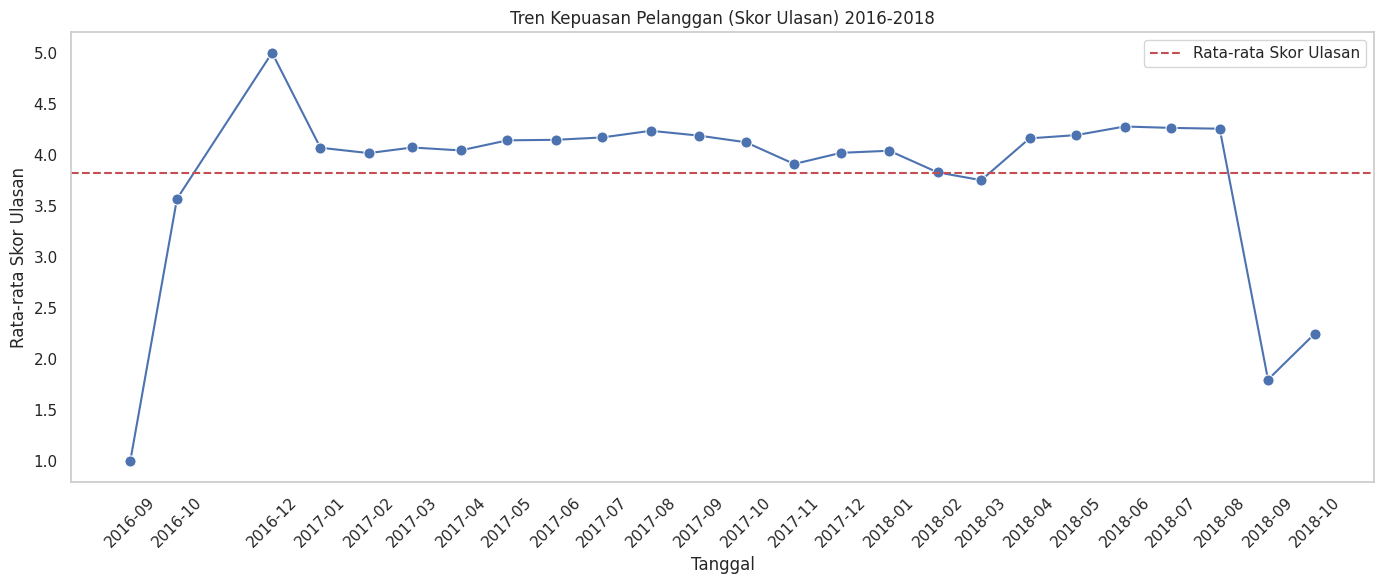

In [277]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_review_trend, x='year_month', y='review_score', marker='o', color='b', markersize=8)

plt.axhline(y=monthly_review_trend['review_score'].mean(), color='r', linestyle='--', label='Rata-rata Skor Ulasan')

plt.xticks(monthly_review_trend['year_month'], rotation=45)
plt.xticks(ticks=monthly_review_trend['year_month'], labels=monthly_review_trend['year_month'].dt.strftime('%Y-%m'), rotation=45)

plt.title("Tren Kepuasan Pelanggan (Skor Ulasan) 2016-2018")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Skor Ulasan")
plt.grid()

plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2: Wilayah mana yang memiliki total pengeluaran tertinggi dari pelanggan dalam pembelian pada tahun 2018?

In [278]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
data_2018_df = all_data[all_data['order_purchase_timestamp'].dt.year == 2018]
total_spending_per_city = data_2018_df.groupby('customer_city')['payment_value'].sum().reset_index()
total_spending_per_city = total_spending_per_city.rename(columns={'payment_value': 'total_spending'})
top_cities_spending = total_spending_per_city.sort_values(by='total_spending', ascending=False).head(10)
print(top_cities_spending)

       customer_city  total_spending
2860       sao paulo      1683799.69
2507  rio de janeiro       745393.84
368   belo horizonte       289547.37
451         brasilia       236368.62
917         curitiba       194860.23
2343    porto alegre       164638.95
2581        salvador       152522.60
572         campinas       149294.92
1219       guarulhos       125017.07
1954         niteroi       107564.95


<ipython-input-279-362d09003b09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_spending, x='customer_city', y='total_spending', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

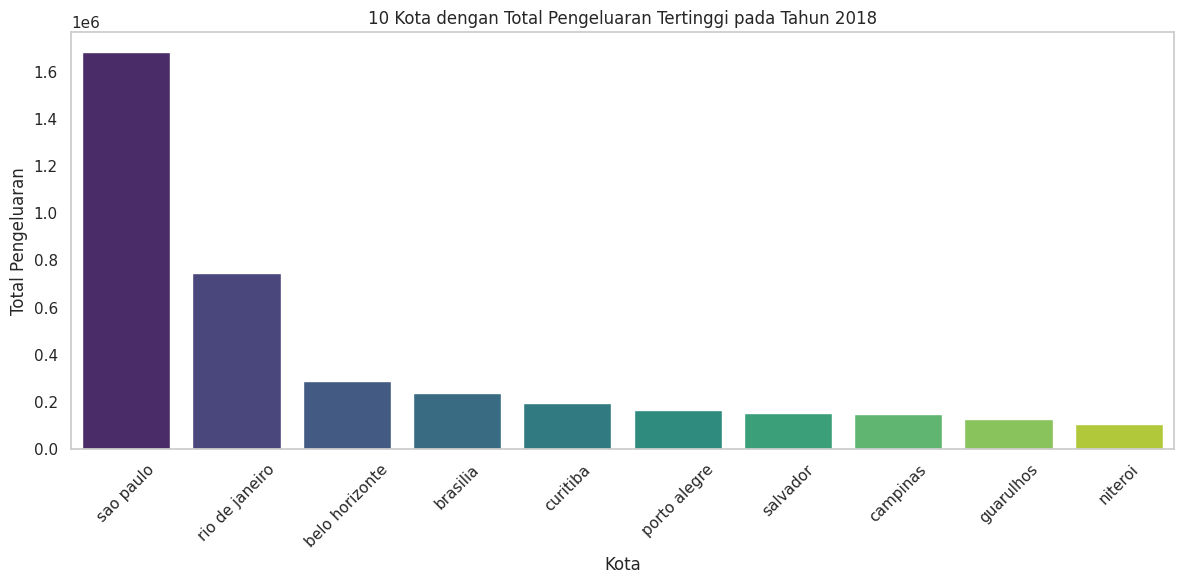

In [279]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities_spending, x='customer_city', y='total_spending', palette='viridis')

plt.title("10 Kota dengan Total Pengeluaran Tertinggi pada Tahun 2018")
plt.xlabel("Kota")
plt.ylabel("Total Pengeluaran")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Berikan 10 barang apa saja yang kah paling dan tidak laris dalam penjualan?

In [280]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()

sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})

sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

top_10_best_selling = sum_order_items_df.head(10)

bottom_10_least_selling = sum_order_items_df.tail(10)

print("10 Barang Terlaris:")
print(top_10_best_selling)

print("\n10 Barang Tidak Terlaris:")
print(bottom_10_least_selling)

10 Barang Terlaris:
   product_category_name_english  products
7                 bed_bath_table     11988
43                 health_beauty     10032
65                sports_leisure      9004
39               furniture_decor      8832
15         computers_accessories      8150
49                    housewares      7380
70                 watches_gifts      6213
68                     telephony      4726
42                  garden_tools      4590
5                           auto      4400

10 Barang Tidak Terlaris:
   product_category_name_english  products
55                         music        40
23           diapers_and_hygiene        39
35                       flowers        33
32                 fashion_sport        31
46                home_comfort_2        31
3          arts_and_craftmanship        24
52                    la_cuisine        16
11             cds_dvds_musicals        14
29     fashion_childrens_clothes         8
61         security_and_services         2


<ipython-input-281-fba715a83b2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=top_10_best_selling, ax=ax[0], palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_ba

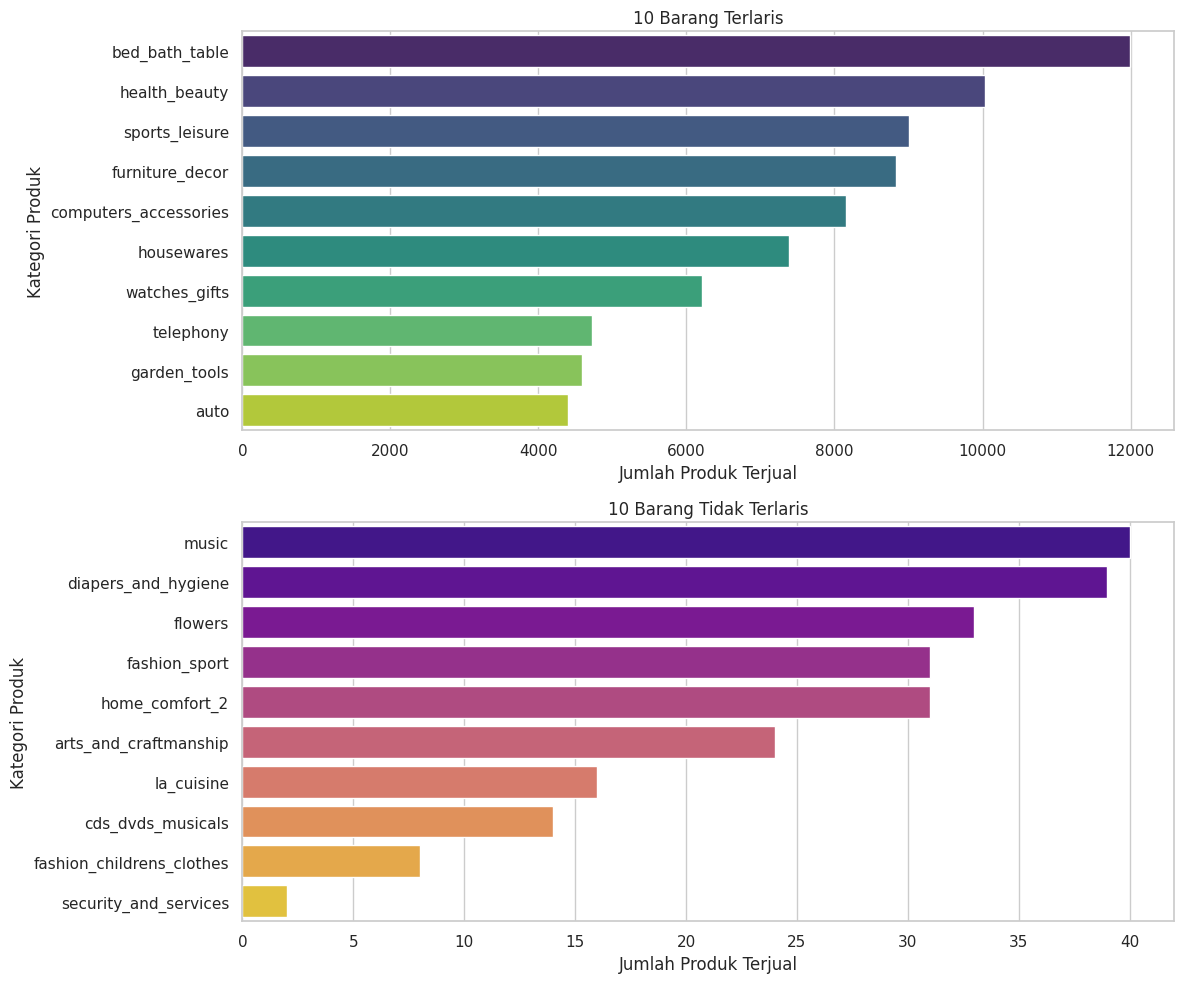

In [281]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(x="products", y="product_category_name_english", data=top_10_best_selling, ax=ax[0], palette="viridis")
ax[0].set_title("10 Barang Terlaris")
ax[0].set_xlabel("Jumlah Produk Terjual")
ax[0].set_ylabel("Kategori Produk")

sns.barplot(x="products", y="product_category_name_english", data=bottom_10_least_selling, ax=ax[1], palette="plasma")
ax[1].set_title("10 Barang Tidak Terlaris")
ax[1].set_xlabel("Jumlah Produk Terjual")
ax[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()

**Insight pada tahapan Visualization & Explanatory Analysis:**
1. **Tren Kepuasan Pelanggan Berdasarkan Skor Ulasan Selama Periode Tahun (2016 - 2018):**
  - Rata-rata skor ulasan menunjukkan fluktuasi yang bervariasi sepanjang periode. Dalam data, skor ulasan terendah tercatat pada September 2016 (1.00), sementara skor tertinggi dicapai pada Desember 2016 (5.00). Tren menunjukkan peningkatan signifikan pada kepuasan pelanggan hingga akhir 2017, dengan skor stabil di atas 4.0. Namun, ada penurunan drastis di bulan September 2018 (1.80) dan Oktober 2018 (2.25). Garis horizontal merah menandakan rata-rata skor ulasan keseluruhan. Pengamatan ini dapat membantu dalam mengidentifikasi periode di mana intervensi mungkin diperlukan untuk meningkatkan kepuasan pelanggan.
2. **Wilayah mana yang memiliki total pengeluaran tertinggi dari pelanggan dalam pembelian pada tahun (2018):**
  - Analisis pengeluaran menunjukkan kota-kota dengan total pengeluaran tertinggi pada tahun 2018. **São Paulo** menempati posisi teratas dengan total pengeluaran mencapai **1,683,799.69**, diikuti oleh **Rio de Janeiro** dan **Belo Horizonte** dengan total pengeluaran masing-masing **745,393.84** dan **289,547.37**. Visualisasi ini mengidentifikasi daerah dengan potensi pasar yang tinggi, yang dapat dijadikan target untuk strategi pemasaran dan pengembangan produk di masa depan.
3. **10 Barang Terlaris dan Tidak Terlaris selama penjualan:**
  - Dengan membandingkan jumlah produk terjual, Anda dapat mengidentifikasi kategori produk yang paling diminati serta yang kurang diminati oleh pelanggan. **Barang terlaris** meliputi **Bed, Bath & Table** dengan **11,988** produk terjual, diikuti oleh **Health & Beauty **dan **Sports & Leisure**. Di sisi lain, **barang tidak terlaris** termasuk kategori seperti **Music** dengan hanya **40** produk terjual dan **Diapers & Hygiene** dengan **39** produk terjual. Insight ini berguna untuk pengelolaan inventaris dan strategi promosi. Misalnya, fokus pada 10 barang terlaris dapat membantu dalam meningkatkan penjualan, sedangkan analisis terhadap barang yang tidak terlaris dapat memberikan wawasan untuk mengidentifikasi penyebab rendahnya permintaan.


###  Analisis pengeluaran pelanggan di Sao Paulo (Analisis Lanjutan)

Untuk analisis lanjutan ini, kita dapat menganalisis pengeluaran pelanggan di Sao Paulo berdasarkan kategori produk. Dengan melihat total pengeluaran per kategori produk, kita dapat memahami preferensi pelanggan di kota ini serta kinerja masing-masing kategori produk. Analisis ini dapat memberikan wawasan yang berharga untuk strategi pemasaran dan pengembangan produk.

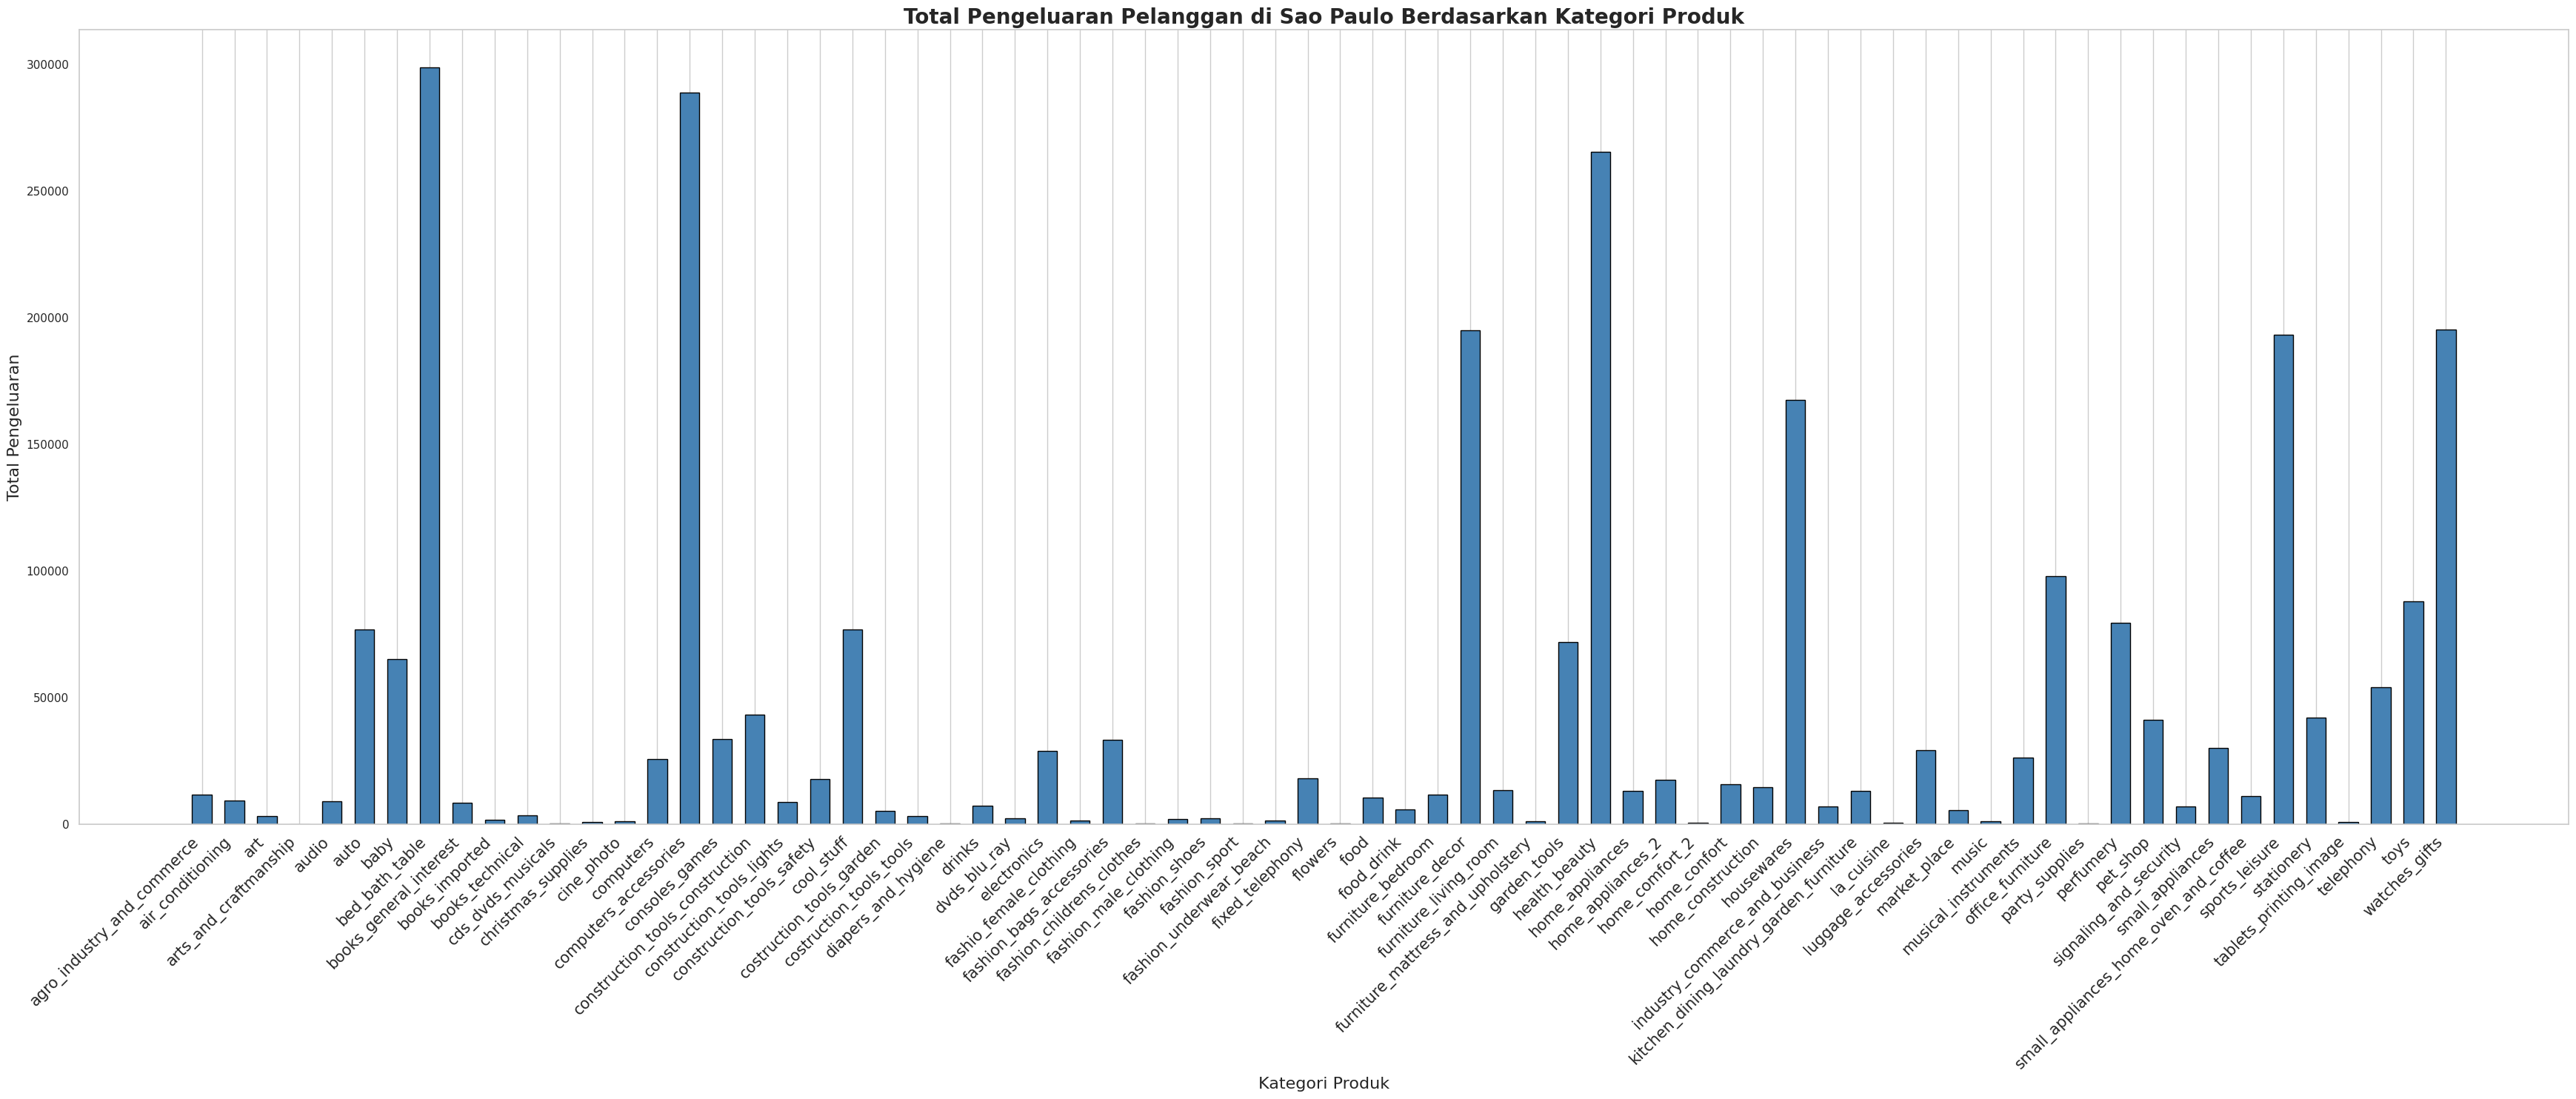

In [282]:
sao_paulo_data = all_data[all_data['customer_city'] == 'sao paulo']

spending_per_category = sao_paulo_data.groupby('product_category_name_english')['payment_value'].sum().reset_index()

plt.figure(figsize=(35, 15))
bar_width = 0.6
x = range(len(spending_per_category))

plt.bar(x, spending_per_category['payment_value'], width=bar_width, color='steelblue', edgecolor='black')

plt.xticks(x, spending_per_category['product_category_name_english'], rotation=45, ha='right', fontsize=15)
plt.title("Total Pengeluaran Pelanggan di Sao Paulo Berdasarkan Kategori Produk", fontsize=20, fontweight='bold')
plt.xlabel("Kategori Produk", fontsize=16)
plt.ylabel("Total Pengeluaran", fontsize=16)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Insight pada tahap analisis lanjutan:**
- Variasi Pengeluaran: Terdapat perbedaan signifikan dalam total pengeluaran berdasarkan kategori produk di Sao Paulo.
-Kategori Teratas: "bed_bath_table," "health_beauty," dan "computers_accessories" menunjukkan pengeluaran tertinggi, menandakan minat kuat terhadap produk rumah tangga, perawatan pribadi, dan aksesori komputer.
-Kategori Rendah: "music" dan "security_and_services" memiliki pengeluaran rendah, mengindikasikan kurangnya minat atau kebutuhan.
-Strategi Pemasaran: Data ini dapat membantu perusahaan dalam menyesuaikan strategi pemasaran dan promosi untuk kategori yang diminati.
-Pengambilan Keputusan: Memahami pola pengeluaran ini mendukung pengambilan keputusan terkait stok, iklan, dan pengembangan produk.

## Conclusion
### Kesimpulan Berdasarkan pertanyaan bisnis dan analisis lanjutan:
1. **Tren Kepuasan Pelanggan (2016-2018)**:
   - Skor ulasan menunjukkan fluktuasi yang signifikan sepanjang periode 2016 hingga 2018. Puncak tertinggi tercatat pada bulan Desember 2016 dan Mei 2018, dengan nilai masing-masing mencapai 5.0 dan 4.19. Namun, terdapat penurunan drastis pada September 2018 dengan skor hanya 1.80, yang menandakan adanya masalah yang perlu diteliti lebih lanjut untuk meningkatkan kepuasan pelanggan.

2. **Pengeluaran Tertinggi oleh Wilayah (2018)**:
   - São Paulo tercatat sebagai kota dengan total pengeluaran tertinggi, mencapai sekitar 1,68 juta USD pada tahun 2018, diikuti oleh Rio de Janeiro dan Belo Horizonte. Hal ini menunjukkan bahwa wilayah metropolitan besar cenderung memiliki daya beli yang lebih tinggi, yang dapat dimanfaatkan untuk strategi pemasaran yang lebih terfokus.

3. **Barang Paling dan Tidak Laris**:
   - Kategori produk terlaris mencakup bed, bath, and table serta health and beauty, yang menunjukkan minat tinggi terhadap produk-produk kebutuhan sehari-hari. Di sisi lain, kategori seperti music dan diapers and hygiene menunjukkan penjualan yang sangat rendah, kurang dari 40 unit, yang bisa mengindikasikan kurangnya minat pasar atau adanya kompetisi yang lebih ketat di segmen tersebut.

4. **Analisis Lanjutan Pengeluaran Pelanggan di São Paulo:**
    - Terdapat variasi yang signifikan dalam total pengeluaran berdasarkan kategori produk, dengan bed_bath_table, health_beauty, dan computers_accessories menunjukkan pengeluaran tertinggi. Sebaliknya, kategori music dan security_and_services menunjukkan pengeluaran yang sangat rendah, yang mengindikasikan adanya kebutuhan untuk meninjau strategi pemasaran pada kategori yang kurang diminati.

### Saran:
1. **Tindak Lanjut pada Penurunan Kepuasan:**:
    - Disarankan untuk melakukan penelitian mendalam guna memahami penyebab penurunan skor ulasan di bulan September 2018. Perusahaan harus mengidentifikasi faktor-faktor yang berkontribusi terhadap kepuasan pelanggan dan melakukan perbaikan yang diperlukan untuk meningkatkan pengalaman pelanggan secara keseluruhan.
2. **Strategi Pemasaran yang Ditingkatkan:**:
    - Sesuaikan strategi pemasaran untuk fokus pada kategori produk dengan pengeluaran tinggi seperti health and beauty dan home goods. Promosi khusus, diskon, atau kampanye pemasaran yang menyoroti produk dalam kategori ini dapat menarik lebih banyak pelanggan dan meningkatkan penjualan.
3. **Optimasi Inventaris dan Diversifikasi Produk:**:
    - Tingkatkan pengelolaan inventaris berdasarkan analisis penjualan untuk memastikan produk terlaris selalu tersedia, sementara kategori dengan penjualan rendah dapat ditinjau untuk pengurangan stok atau diversifikasi produk. Mengidentifikasi penyebab rendahnya permintaan pada produk yang tidak laris dapat membantu dalam menyesuaikan tawaran produk di masa depan.
4. **Penargetan Pasar Spesifik:**
    - Mengingat pengeluaran yang signifikan dari pelanggan di São Paulo, pertimbangkan untuk mengembangkan kampanye pemasaran yang lebih terfokus pada wilayah tersebut. Menyesuaikan promosi dan penawaran produk dengan preferensi lokal dapat meningkatkan konversi penjualan.
